![Bellabeat.jpg](https://miro.medium.com/v2/resize:fit:828/format:webp/1*5aFLN-ffWKNHLeb56Ieufw.jpeg)

# Summary of the Case Study

In this case study, you are a junior data analyst working for Bellabeat, a company specializing in health-focused products for women. Your task is to analyze smart device data to uncover insights into consumer usage patterns. These insights will guide the marketing strategy for Bellabeat. You will focus on one product, explore usage data, and present your findings and recommendations to the Bellabeat executive team.

# Business Task

The business task is to analyze smart device usage data to identify trends and insights that can be applied to Bellabeat's product offerings. This analysis aims to inform and improve Bellabeat's marketing strategy, thereby supporting the company's growth in the global smart device market. The final deliverable will include a report with a clear summary of the business task, data sources, data cleaning and manipulation documentation, analysis summary, supporting visualizations, and high-level marketing recommendations.

# Description of All Data Sources Used

The dataset for this analysis was generated by respondents to a distributed survey via Amazon Mechanical Turk between March 12, 2016, and May 12, 2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, which includes minute-level output for physical activity, heart rate, and sleep monitoring. Individual reports can be parsed by export session ID or timestamp. Variation in output represents the use of different types of Fitbit trackers and individual tracking behaviors and preferences.

I downloaded the [zip file](https://www.kaggle.com/datasets/arashnic/fitbit) containing the dataset Excel files. The folder name was "FitBit Data 4.12.16 - 5.12.16". There were around 18 files, but I found only three files relevant for our analysis:

* **dailyActivity_merged:** Contains comprehensive daily activity data, including steps taken, distance traveled, active minutes, and calories burned.

* **sleepDay_merged:** Includes data on users' sleep patterns, such as the number of sleep records, total minutes asleep, and total time in bed.

* **hourlySteps_merged:** Provides data on the number of steps taken by users on an hourly basis, giving a detailed view of physical activity throughout the day.


# Data Cleaning and Manipulation

In this phase, we focused on preparing our datasets for analysis by cleaning and manipulating the data using R. This process ensures that our data is accurate, consistent, and ready for further analysis. Below is a detailed explanation of each step undertaken:

## 1. Loading Necessary Libraries
Before starting with the data manipulation, I loaded the essential R libraries to facilitate data processing:

In [1]:
library(tidyverse)  # For data manipulation and visualization
library(tidyr)      # For data tidying functions
library(here)       # For managing file paths
library(ggpubr)     # For enhancing ggplot2 visualizations
library(skimr)      # For summarizing data
library(janitor)    # For cleaning data
library(lubridate)  # For date-time manipulation
library(ggrepel)    # For adding text labels in ggplot2

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
here() starts at /kaggle/working


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




These libraries provide a comprehensive suite of tools for handling data, making it easier to perform complex transformations and visualizations.

## 2. Loading the Data
I imported three CSV files containing Fitbit tracker data into R and created corresponding data frames:

In [2]:

daily_activity <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")

daily_sleep <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

hourly_steps <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")


Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 22099 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, StepTotal

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or 

## 3. Exploring the Data
I used the **head()** function to get a preview of the datasets, helping me understand the structure and the nature of the data:

In [3]:
head(daily_activity)
head(daily_sleep)
head(hourly_steps)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


Id,ActivityHour,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151
1503960366,4/12/2016 3:00:00 AM,0
1503960366,4/12/2016 4:00:00 AM,0
1503960366,4/12/2016 5:00:00 AM,0


## 4. Identifying Unique Respondents
To assess the sample size, I determined the number of unique respondents in each dataset using the **n_unique()** function:

In [4]:
n_unique(daily_activity$Id)
n_unique(daily_sleep$Id)
n_unique(hourly_steps$Id)

[1] 33

[1] 24

[1] 33

## 5. Checking for Duplicate Entries
I checked for duplicate entries in each dataset to ensure data quality and accuracy. Duplicate entries can skew analysis results and lead to inaccurate insights.

In [5]:
sum(duplicated(daily_activity))
sum(duplicated(daily_sleep))
sum(duplicated(hourly_steps))

[1] 0

[1] 3

[1] 0

## 6. Removing Duplicates and Handling Missing Values
For the *daily_sleep* dataset, I removed duplicate entries and handled any missing values using the **distinct()** and **drop_na()** functions:

In [6]:
daily_activity <- daily_activity %>%
  distinct() %>% 
  drop_na()

daily_sleep <- daily_sleep %>%
  distinct() %>% 
  drop_na()

hourly_steps <- hourly_steps %>%
  distinct() %>% 
  drop_na()

We can verify the removal of duplicates by checking the *daily_sleep* dataset again.

In [7]:
sum(duplicated(daily_sleep))

[1] 0

## 7. Cleaning and Formatting Column Names
I standardized column names across all datasets using **clean_names()** and **rename_with(tolower)** for consistency and ease of merging:

In [8]:
clean_names(daily_activity)
daily_activity <- rename_with(daily_activity, tolower)

clean_names(daily_sleep)
daily_sleep <- rename_with(daily_sleep, tolower)

clean_names(hourly_steps)
hourly_steps <- rename_with(hourly_steps, tolower)


id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
1503960366,4/18/2016,13019,8.59,8.59,0,3.25,0.64,4.71,0,42,16,233,1149,1921
1503960366,4/19/2016,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035
1503960366,4/20/2016,10544,6.68,6.68,0,1.96,0.48,4.24,0,28,12,205,818,1786


id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320
1503960366,4/20/2016 12:00:00 AM,1,360,377
1503960366,4/21/2016 12:00:00 AM,1,325,364
1503960366,4/23/2016 12:00:00 AM,1,361,384


id,activity_hour,step_total
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151
1503960366,4/12/2016 3:00:00 AM,0
1503960366,4/12/2016 4:00:00 AM,0
1503960366,4/12/2016 5:00:00 AM,0
1503960366,4/12/2016 6:00:00 AM,0
1503960366,4/12/2016 7:00:00 AM,0
1503960366,4/12/2016 8:00:00 AM,250


## 8. Formatting Date and Time Columns
I converted date and time columns to appropriate formats for accurate data analysis. This step involved using **as_date()** and **as.POSIXct()** functions:

In [9]:
daily_activity <- daily_activity %>% 
  rename(date = activitydate) %>% 
  mutate(date = as_date(date, format = "%m/%d/%Y"))

daily_sleep <- daily_sleep %>% 
  rename(date = sleepday) %>% 
  mutate(date = as_date(date, format = "%m/%d/%Y %I:%M:%S %p", tz = Sys.timezone()))

hourly_steps <- hourly_steps %>% 
  rename(date_time = activityhour) %>% 
  mutate(date_time = as.POSIXct(date_time, format = "%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone()))

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `date = as_date(date, format = "%m/%d/%Y %I:%M:%S %p", tz =
  Sys.timezone())`.
Caused by warning:
! `tz` argument is ignored by `as_date()`”


## 9. Merging Datasets
With the data cleaned and standardized, I merged the *daily_activity* and *daily_sleep* datasets using **'Id'** and **'Date'** as primary keys. This integration facilitated a comprehensive analysis of daily activity and sleep patterns:

In [10]:
daily_activity_sleep <- merge(daily_activity, daily_sleep, by = c("id", "date"))
glimpse(daily_activity_sleep)

Rows: 410
Columns: 18
$ id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ date                     <date> 2016-04-12, 2016-04-13, 2016-04-15, 2016-04-…
$ totalsteps               <dbl> 13162, 10735, 9762, 12669, 9705, 15506, 10544…
$ totaldistance            <dbl> 8.50, 6.97, 6.28, 8.16, 6.48, 9.88, 6.68, 6.3…
$ trackerdistance          <dbl> 8.50, 6.97, 6.28, 8.16, 6.48, 9.88, 6.68, 6.3…
$ loggedactivitiesdistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ veryactivedistance       <dbl> 1.88, 1.57, 2.14, 2.71, 3.19, 3.53, 1.96, 1.3…
$ moderatelyactivedistance <dbl> 0.55, 0.69, 1.26, 0.41, 0.78, 1.32, 0.48, 0.3…
$ lightactivedistance      <dbl> 6.06, 4.71, 2.83, 5.04, 2.51, 5.03, 4.24, 4.6…
$ sedentaryactivedistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ veryactiveminutes        <dbl> 25, 21, 29, 36, 38, 50, 28, 19, 41, 39, 73, 3…
$ fairlyactiveminutes      <dbl> 13, 19, 34, 10, 20, 31, 12, 8, 21, 5, 14, 23,…
$ lightlyactivemin

# Analyse and share phase

In this phase, we will examine trends among Fitbit users to inform Bellabeat's marketing strategies.

## a) Type of Users per Activity Level

Given that we lack demographic data in our dataset, we will classify users based on their activity levels, specifically by examining their daily step counts. This classification will help us identify distinct types of users and their activity patterns. Here are the categories we'll use:

* Sedentary: Fewer than 5,000 steps a day.
* Lightly Active: Between 5,000 and 7,499 steps a day.
* Fairly Active: Between 7,500 and 9,999 steps a day.
* Very Active: More than 10,000 steps a day.

We'll begin by calculating each user's average daily steps, calories burned, and sleep minutes.

In [11]:
daily_average <- daily_activity_sleep %>%
  group_by(id) %>%
  summarise (mean_daily_steps = mean(totalsteps), mean_daily_calories = mean(calories), mean_daily_sleep = mean(totalminutesasleep))

head(daily_average)

id,mean_daily_steps,mean_daily_calories,mean_daily_sleep
<dbl>,<dbl>,<dbl>,<dbl>
1503960366,12405.680,1872.280,360.2800
1644430081,7967.750,2977.750,294.0000
1844505072,3477.000,1676.333,652.0000
1927972279,1490.000,2316.200,417.0000
2026352035,5618.679,1540.786,506.1786
2320127002,5079.000,1804.000,61.0000


Next, we'll categorize users according to their average daily step count, adding a new column to indicate the user type based on the predefined activity levels.

In [12]:
user_type <- daily_average %>%
  mutate(user_type = case_when(
    mean_daily_steps < 5000 ~ "sedentary",
    mean_daily_steps >= 5000 & mean_daily_steps < 7499 ~ "lightly active", 
    mean_daily_steps >= 7500 & mean_daily_steps < 9999 ~ "fairly active", 
    mean_daily_steps >= 10000 ~ "very active"
  ))

head(user_type)

id,mean_daily_steps,mean_daily_calories,mean_daily_sleep,user_type
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,12405.680,1872.280,360.2800,very active
1644430081,7967.750,2977.750,294.0000,fairly active
1844505072,3477.000,1676.333,652.0000,sedentary
1927972279,1490.000,2316.200,417.0000,sedentary
2026352035,5618.679,1540.786,506.1786,lightly active
2320127002,5079.000,1804.000,61.0000,lightly active


With our user types defined, we'll now create a data frame that shows the percentage of each user type. This will allow us to visualize how users are distributed across different activity levels.

In [13]:
user_type_percent <- user_type %>%
  group_by(user_type) %>%
  summarise(total = n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(user_type) %>%
  summarise(total_percent = total / totals) %>%
  mutate(labels = scales::percent(total_percent))

user_type_percent$user_type <- factor(user_type_percent$user_type , levels = c("very active", "fairly active", "lightly active", "sedentary"))


head(user_type_percent)

user_type,total_percent,labels
<fct>,<dbl>,<chr>
fairly active,0.3750000,38%
lightly active,0.2083333,21%
sedentary,0.2083333,21%
very active,0.2083333,21%


The graph below illustrates the distribution of users based on their activity levels, as determined by their average daily step count.

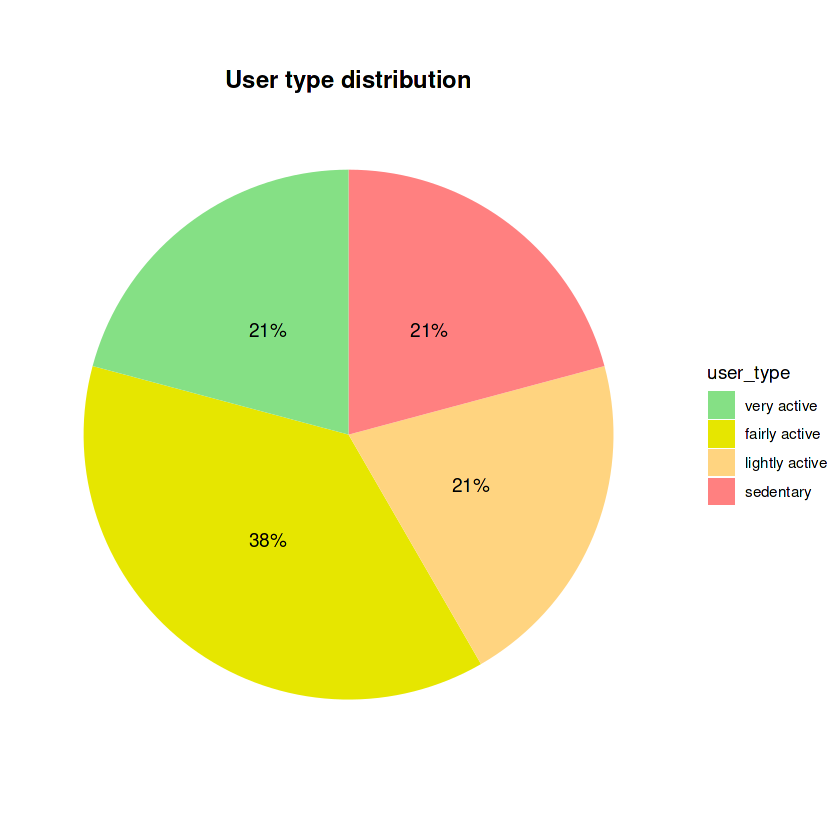

In [14]:
user_type_percent %>%
  ggplot(aes(x="",y=total_percent, fill=user_type)) +
  geom_bar(stat = "identity", width = 1)+
  coord_polar("y", start=0)+
  theme_minimal()+
  theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 0.5, size=14, face = "bold")) +
  scale_fill_manual(values = c("#85e085","#e6e600", "#ffd480", "#ff8080")) +
  geom_text(aes(label = labels),
            position = position_stack(vjust = 0.5))+
  labs(title="User type distribution")

## b) Steps and Minutes Asleep Per Weekday

In this section, we aim to analyze user activity and sleep patterns by day of the week. Our goal is to identify which days users are most active and which days they tend to sleep more. Additionally, we will evaluate whether users meet the recommended daily step count and sleep duration.

We will start by calculating the day of the week from the date column and determine the average steps walked and minutes slept for each day of the week.

In [15]:
weekday_steps_sleep <- daily_activity_sleep %>%
  mutate(weekday = weekdays(date))

weekday_steps_sleep$weekday <-ordered(weekday_steps_sleep$weekday, levels=c("Monday", "Tuesday", "Wednesday", "Thursday",
"Friday", "Saturday", "Sunday"))

 weekday_steps_sleep <-weekday_steps_sleep%>%
  group_by(weekday) %>%
  summarize (daily_steps = mean(totalsteps), daily_sleep = mean(totalminutesasleep))

head(weekday_steps_sleep)

weekday,daily_steps,daily_sleep
<ord>,<dbl>,<dbl>
Monday,9273.217,419.5000
Tuesday,9182.692,404.5385
Wednesday,8022.864,434.6818
Thursday,8183.516,401.2969
Friday,7901.404,405.4211
Saturday,9871.123,419.0702


To visualize these patterns, we use two bar graphs: one for average daily steps and another for average daily sleep minutes, both segmented by weekday. The graphs also include reference lines indicating the recommended daily steps (7,500) and recommended sleep duration (480 minutes or 8 hours).

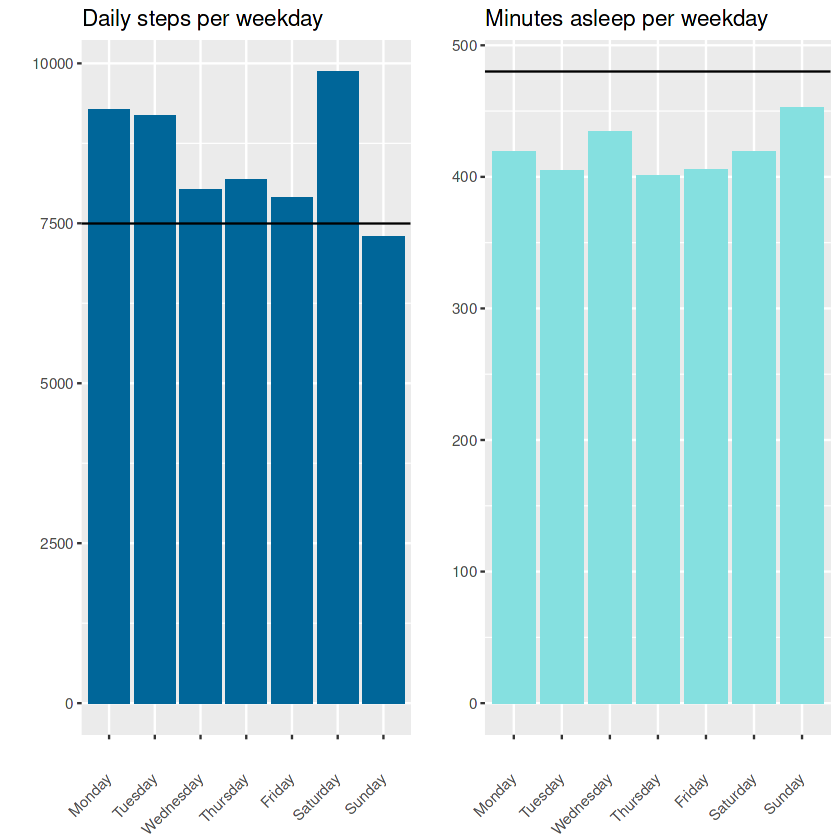

In [16]:
ggarrange(
    ggplot(weekday_steps_sleep) +
      geom_col(aes(weekday, daily_steps), fill = "#006699") +
      geom_hline(yintercept = 7500) +
      labs(title = "Daily steps per weekday", x= "", y = "") +
      theme(axis.text.x = element_text(angle = 45,vjust = 0.5, hjust = 1)),
    ggplot(weekday_steps_sleep, aes(weekday, daily_sleep)) +
      geom_col(fill = "#85e0e0") +
      geom_hline(yintercept = 480) +
      labs(title = "Minutes asleep per weekday", x= "", y = "") +
      theme(axis.text.x = element_text(angle = 45,vjust = 0.5, hjust = 1))
  )

Based on the graphs generated, we can draw the following insights:

**Activity Levels:**

* Users generally meet the recommended daily step count of 7,500 steps on most weekdays, with an exception on Sundays. This indicates that users are more active during the workweek, possibly due to a structured daily routine.

* The dip in activity on Sundays suggests that users may engage in less physical activity on weekends, which could be due to rest or leisure activities taking precedence.

**Sleep Patterns:**

* On average, users fall short of the recommended 8 hours (480 minutes) of sleep per night across all weekdays. This trend might highlight a common issue of sleep deprivation among users, which could be due to work, lifestyle, or other commitments.

* It’s important to consider that while weekdays show a uniform pattern, weekend sleep patterns might reflect a slight increase, although still not meeting the ideal sleep target.

## c) Hourly Steps Throughout the Day

In this section, we aim to identify the specific times of day when users are most active. Understanding the daily activity patterns of users can provide valuable insights for tailoring wellness strategies and marketing efforts.


We'll begin by utilizing the *hourly_steps* data frame, where we will separate the date_time column into date and time for better granularity in analysis.

In [17]:
hourly_steps <- hourly_steps %>%
  separate(date_time, into = c("date", "time"), sep= " ") %>%
  mutate(date = ymd(date)) 
  
head(hourly_steps)

Warning message:
“Expected 2 pieces. Missing pieces filled with `NA` in 934 rows [1, 25, 49, 73,
97, 121, 145, 169, 193, 217, 241, 265, 289, 313, 337, 361, 385, 409, 433, 457,
...].”


id,date,time,steptotal
<dbl>,<date>,<chr>,<dbl>
1503960366,2016-04-12,NA,373
1503960366,2016-04-12,01:00:00,160
1503960366,2016-04-12,02:00:00,151
1503960366,2016-04-12,03:00:00,0
1503960366,2016-04-12,04:00:00,0
1503960366,2016-04-12,05:00:00,0


Next, we will group the data by time and calculate the average number of steps taken each hour. This will allow us to visualize how user activity varies throughout the day.

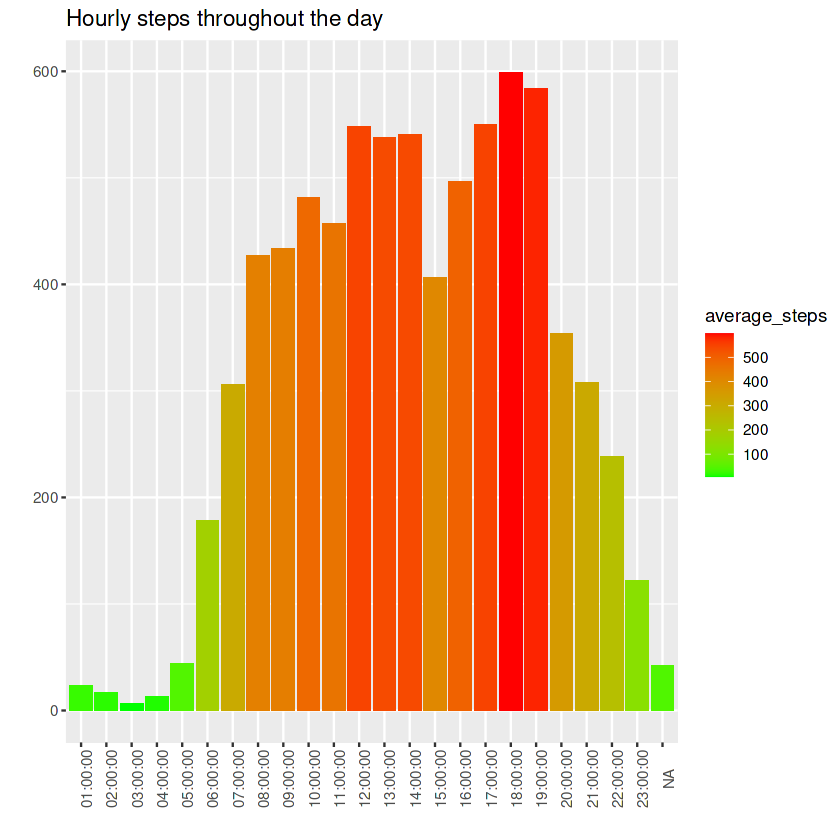

In [18]:
hourly_steps %>%
  group_by(time) %>%
  summarize(average_steps = mean(steptotal)) %>%
  ggplot() +
  geom_col(mapping = aes(x=time, y = average_steps, fill = average_steps)) + 
  labs(title = "Hourly steps throughout the day", x="", y="") + 
  scale_fill_gradient(low = "green", high = "red")+
  theme(axis.text.x = element_text(angle = 90))

Based on the graph produced, we observe the following trends in user activity levels:

**Peak Activity Hours:**

* Users show heightened activity levels between 8 AM and 7 PM, suggesting these are the hours when users are most mobile. This trend likely reflects typical daily routines where individuals are either commuting, working, or engaging in daily tasks.

**Lunchtime Activity Surge:**

* There is a noticeable spike in steps between 12 PM and 2 PM, which aligns with lunchtime. This indicates that users are more active during this period, possibly taking short walks or engaging in physical activity during lunch breaks.

**Evening Activity Increase:**

* Another increase in activity is seen from 5 PM to 7 PM, which may correspond to post-work routines, such as gym sessions, walks, or other physical activities before settling down for the evening.

## d) Correlations

In this section, we'll explore the correlations between different variables to gain insights into the relationships between daily steps, sleep, and calories burned.

We will focus on two specific relationships:

* Daily Steps vs. Daily Sleep
* Daily Steps vs. Calories Burned

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


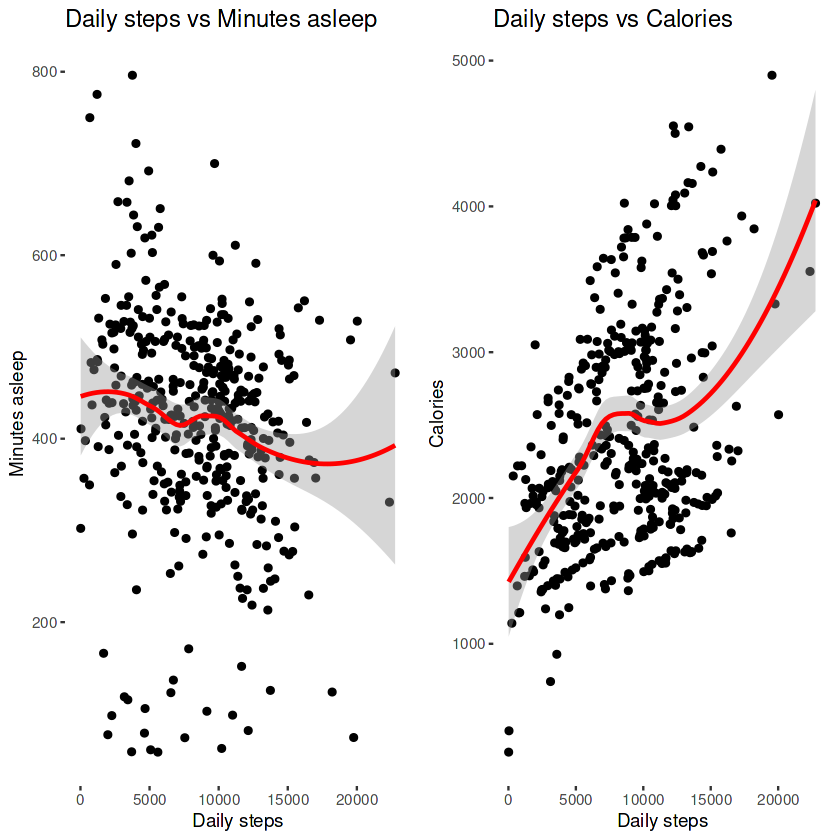

In [19]:
ggarrange(
ggplot(daily_activity_sleep, aes(x=totalsteps, y=totalminutesasleep))+
  geom_jitter() +
  geom_smooth(color = "red") + 
  labs(title = "Daily steps vs Minutes asleep", x = "Daily steps", y= "Minutes asleep") +
   theme(panel.background = element_blank(),
        plot.title = element_text( size=14)), 
ggplot(daily_activity_sleep, aes(x=totalsteps, y=calories))+
  geom_jitter() +
  geom_smooth(color = "red") + 
  labs(title = "Daily steps vs Calories", x = "Daily steps", y= "Calories") +
   theme(panel.background = element_blank(),
        plot.title = element_text( size=14))
)

After analyzing the plots generated by the above code, we observe the following insights:

**Daily Steps vs. Minutes Asleep:**

* The scatter plot shows a wide dispersion of points, and the trend line appears relatively flat.

* This indicates no significant correlation between the number of steps taken daily and the amount of sleep a user gets.

**Daily Steps vs. Calories Burned:**

* The scatter plot reveals a positive trend, with the trend line indicating a clear positive correlation.

* This correlation suggests that as the number of daily steps increases, the calories burned also increase, confirming the intuitive relationship between physical activity and energy expenditure.

## e) Use of Smart Device

### i) Days Used Smart Device

In this section, we aim to uncover insights about the frequency with which users engage with their smart devices. By understanding these usage patterns, we can refine our marketing strategy to encourage more consistent use and highlight features that promote user retention.

**Objective:**

* To determine how often users in our dataset interact with their devices.

* To classify user engagement into three distinct categories based on the number of days they actively use the device over a 31-day period.

Categories for Device Usage:

* High Use: Devices are used between 21 to 31 days.
* Moderate Use: Devices are used between 11 to 20 days.
* Low Use: Devices are used between 1 to 10 days.


First, we create a new data frame that groups users by their ID, calculates the number of days they used their devices, and assigns them into one of the above usage categories:

In [20]:
daily_use <- daily_activity_sleep %>%
  group_by(id) %>%
  summarize(days_used=sum(n())) %>%
  mutate(usage = case_when(
    days_used >= 1 & days_used <= 10 ~ "low use",
    days_used >= 11 & days_used <= 20 ~ "moderate use", 
    days_used >= 21 & days_used <= 31 ~ "high use", 
  ))
  
head(daily_use)

id,days_used,usage
<dbl>,<int>,<chr>
1503960366,25,high use
1644430081,4,low use
1844505072,3,low use
1927972279,5,low use
2026352035,28,high use
2320127002,1,low use


Next, we calculate the percentage of users in each category to help visualize the data more clearly:

In [21]:
daily_use_percent <- daily_use %>%
  group_by(usage) %>%
  summarise(total = n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(usage) %>%
  summarise(total_percent = total / totals) %>%
  mutate(labels = scales::percent(total_percent))

daily_use_percent$usage <- factor(daily_use_percent$usage, levels = c("high use", "moderate use", "low use"))

head(daily_use_percent)

usage,total_percent,labels
<fct>,<dbl>,<chr>
high use,0.500,50%
low use,0.375,38%
moderate use,0.125,12%


Finally, we create a pie chart to illustrate the distribution of users across the different usage categories:

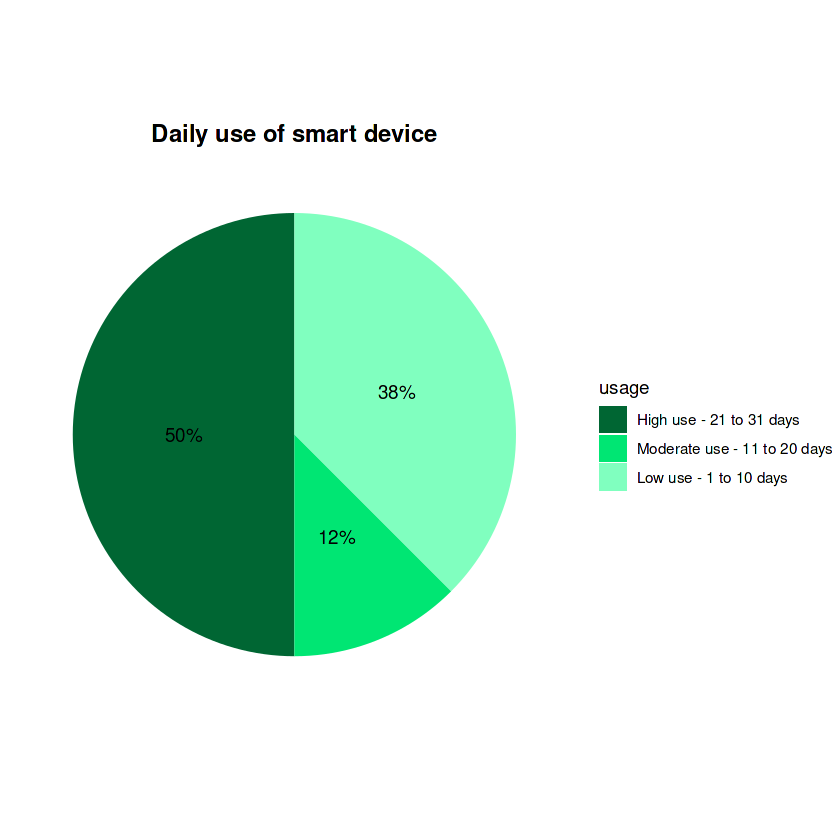

In [22]:
daily_use_percent %>%
  ggplot(aes(x="",y=total_percent, fill=usage)) +
  geom_bar(stat = "identity", width = 1)+
  coord_polar("y", start=0)+
  theme_minimal()+
  theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 0.5, size=14, face = "bold")) +
  geom_text(aes(label = labels),
            position = position_stack(vjust = 0.5))+
  scale_fill_manual(values = c("#006633","#00e673","#80ffbf"),
                    labels = c("High use - 21 to 31 days",
                                 "Moderate use - 11 to 20 days",
                                 "Low use - 1 to 10 days"))+
  labs(title="Daily use of smart device")

Analyzing the pie chart from the above visualization, we derive the following key insights:

**High Usage (21 to 31 days):**

* Percentage: Approximately 50% of users demonstrate high engagement with their devices, utilizing them almost daily.
* Implication: This indicates a significant portion of users are highly reliant on their devices, perhaps due to their desire to track fitness goals consistently or maintain a health-conscious lifestyle.

**Moderate Usage (11 to 20 days):**

* Percentage: About 12% of users fall into this category, showing moderate engagement.
* Implication: Users in this segment might be casual users who need incentives or features that encourage more frequent device usage.

**Low Usage (1 to 10 days):**

* Percentage: A considerable 38% of users rarely use their devices.
* Implication: This suggests potential areas for growth; Bellabeat could focus on strategies that increase engagement, such as enhancing user experience, offering personalized insights, or emphasizing features that align with users’ specific needs and lifestyles.

### ii) Time Used Smart Device

In this section, we'll focus on understanding how much time users spend wearing their smart devices each day. This analysis will help us determine the daily usage patterns and how committed users are to keeping their devices on throughout the day.

**Objective:**

To categorize users based on the amount of time they wear their devices each day, and then analyze these patterns in the context of daily device usage.

Usage Categories Based on Time Worn:

* All Day: Device is worn for the entire day (24 hours or 1440 minutes).
* More Than Half Day: Device is worn for more than 12 hours.
* Less Than Half Day: Device is worn for less than 12 hours.

We'll start by merging the *daily_activity* and *daily_use* data frames to associate each user's daily activity data with their overall usage classification:

In [23]:
daily_use_merged <- merge(daily_activity, daily_use, by=c ("id"))
head(daily_use_merged)

,id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,days_used,usage
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,1503960366,2016-05-07,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821,25,high use
2,1503960366,2016-05-06,12159,8.03,8.03,0,1.97,0.25,5.81,0,24,6,289,754,1896,25,high use
3,1503960366,2016-05-01,10602,6.81,6.81,0,2.29,1.60,2.92,0,33,35,246,730,1820,25,high use
4,1503960366,2016-04-30,14673,9.25,9.25,0,3.56,1.42,4.27,0,52,34,217,712,1947,25,high use
5,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,25,high use
6,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,25,high use


Next, we'll create a new data frame, minutes_worn, which calculates the total minutes the device was worn daily and categorizes it according to the aforementioned time usage classifications:

In [24]:
minutes_worn <- daily_use_merged %>% 
  mutate(total_minutes_worn = veryactiveminutes+fairlyactiveminutes+lightlyactiveminutes+sedentaryminutes)%>%
  mutate (percent_minutes_worn = (total_minutes_worn/1440)*100) %>%
  mutate (worn = case_when(
    percent_minutes_worn == 100 ~ "All day",
    percent_minutes_worn < 100 & percent_minutes_worn >= 50~ "More than half day", 
    percent_minutes_worn < 50 & percent_minutes_worn > 0 ~ "Less than half day"
  ))

head(minutes_worn)

,id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,days_used,usage,total_minutes_worn,percent_minutes_worn,worn
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<chr>
1,1503960366,2016-05-07,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821,25,high use,1091,75.76389,More than half day
2,1503960366,2016-05-06,12159,8.03,8.03,0,1.97,0.25,5.81,0,24,6,289,754,1896,25,high use,1073,74.51389,More than half day
3,1503960366,2016-05-01,10602,6.81,6.81,0,2.29,1.60,2.92,0,33,35,246,730,1820,25,high use,1044,72.50000,More than half day
4,1503960366,2016-04-30,14673,9.25,9.25,0,3.56,1.42,4.27,0,52,34,217,712,1947,25,high use,1015,70.48611,More than half day
5,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,25,high use,1094,75.97222,More than half day
6,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,25,high use,1033,71.73611,More than half day


To visualize these results, we'll create four data frames and then pie charts. The first will show the overall distribution of time usage categories across all users, and the others will provide insights based on the user's daily usage classification (high, moderate, low):

In [25]:
minutes_worn_percent<- minutes_worn%>%
  group_by(worn) %>%
  summarise(total = n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(worn) %>%
  summarise(total_percent = total / totals) %>%
  mutate(labels = scales::percent(total_percent))


minutes_worn_highuse <- minutes_worn%>%
  filter (usage == "high use")%>%
  group_by(worn) %>%
  summarise(total = n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(worn) %>%
  summarise(total_percent = total / totals) %>%
  mutate(labels = scales::percent(total_percent))

minutes_worn_moduse <- minutes_worn%>%
  filter(usage == "moderate use") %>%
  group_by(worn) %>%
  summarise(total = n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(worn) %>%
  summarise(total_percent = total / totals) %>%
  mutate(labels = scales::percent(total_percent))

minutes_worn_lowuse <- minutes_worn%>%
  filter (usage == "low use") %>%
  group_by(worn) %>%
  summarise(total = n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(worn) %>%
  summarise(total_percent = total / totals) %>%
  mutate(labels = scales::percent(total_percent))

minutes_worn_highuse$worn <- factor(minutes_worn_highuse$worn, levels = c("All day", "More than half day", "Less than half day"))
minutes_worn_percent$worn <- factor(minutes_worn_percent$worn, levels = c("All day", "More than half day", "Less than half day"))
minutes_worn_moduse$worn <- factor(minutes_worn_moduse$worn, levels = c("All day", "More than half day", "Less than half day"))
minutes_worn_lowuse$worn <- factor(minutes_worn_lowuse$worn, levels = c("All day", "More than half day", "Less than half day"))

head(minutes_worn_percent)
head(minutes_worn_highuse)
head(minutes_worn_moduse)
head(minutes_worn_lowuse)

worn,total_percent,labels
<fct>,<dbl>,<chr>
All day,0.36465638,36%
Less than half day,0.03506311,4%
More than half day,0.60028050,60%


worn,total_percent,labels
<fct>,<dbl>,<chr>
All day,0.06756757,6.8%
Less than half day,0.04324324,4.3%
More than half day,0.88918919,88.9%


worn,total_percent,labels
<fct>,<dbl>,<chr>
All day,0.2666667,27%
Less than half day,0.0400000,4%
More than half day,0.6933333,69%


worn,total_percent,labels
<fct>,<dbl>,<chr>
All day,0.80223881,80%
Less than half day,0.02238806,2%
More than half day,0.17537313,18%


**Visualization:**

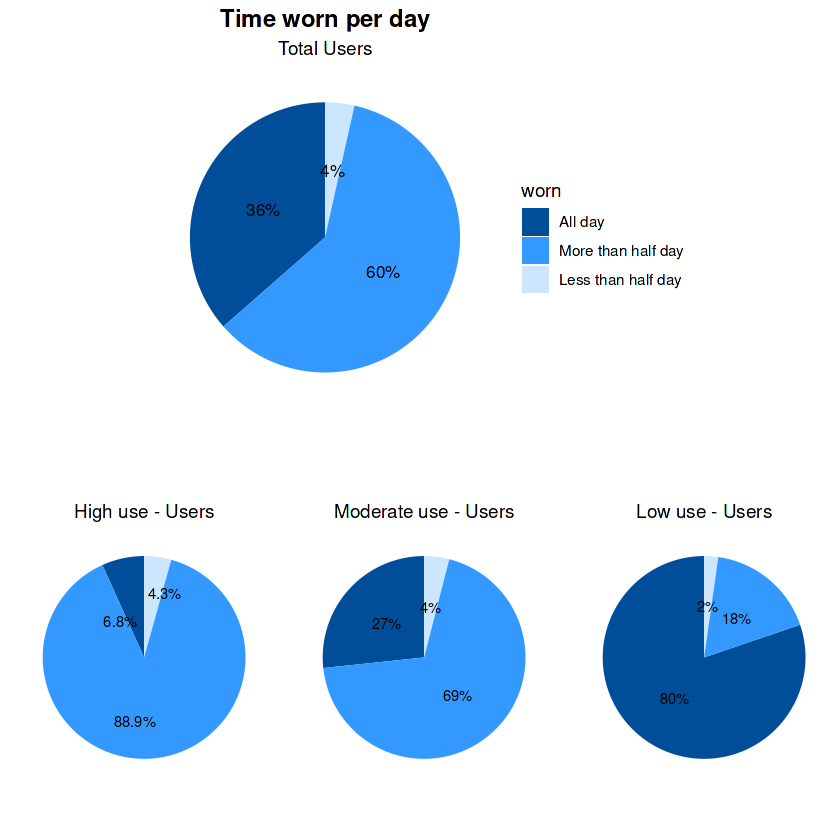

In [26]:
ggarrange(
  ggplot(minutes_worn_percent, aes(x="",y=total_percent, fill=worn)) +
  geom_bar(stat = "identity", width = 1)+
  coord_polar("y", start=0)+
  theme_minimal()+
  theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 0.5, size=14, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5)) +
    scale_fill_manual(values = c("#004d99", "#3399ff", "#cce6ff"))+
  geom_text(aes(label = labels),
            position = position_stack(vjust = 0.5), size = 3.5)+
  labs(title="Time worn per day", subtitle = "Total Users"),
  ggarrange(
  ggplot(minutes_worn_highuse, aes(x="",y=total_percent, fill=worn)) +
  geom_bar(stat = "identity", width = 1)+
  coord_polar("y", start=0)+
  theme_minimal()+
  theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 0.5, size=14, face = "bold"),
        plot.subtitle = element_text(hjust = 0.5), 
        legend.position = "none")+
    scale_fill_manual(values = c("#004d99", "#3399ff", "#cce6ff"))+
  geom_text_repel(aes(label = labels),
            position = position_stack(vjust = 0.5), size = 3)+
  labs(title="", subtitle = "High use - Users"), 
  ggplot(minutes_worn_moduse, aes(x="",y=total_percent, fill=worn)) +
  geom_bar(stat = "identity", width = 1)+
  coord_polar("y", start=0)+
  theme_minimal()+
  theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 0.5, size=14, face = "bold"), 
        plot.subtitle = element_text(hjust = 0.5),
        legend.position = "none") +
    scale_fill_manual(values = c("#004d99", "#3399ff", "#cce6ff"))+
  geom_text(aes(label = labels),
            position = position_stack(vjust = 0.5), size = 3)+
  labs(title="", subtitle = "Moderate use - Users"), 
  ggplot(minutes_worn_lowuse, aes(x="",y=total_percent, fill=worn)) +
  geom_bar(stat = "identity", width = 1)+
  coord_polar("y", start=0)+
  theme_minimal()+
  theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 0.5, size=14, face = "bold"), 
        plot.subtitle = element_text(hjust = 0.5),
        legend.position = "none") +
    scale_fill_manual(values = c("#004d99", "#3399ff", "#cce6ff"))+
  geom_text(aes(label = labels),
            position = position_stack(vjust = 0.5), size = 3)+
  labs(title="", subtitle = "Low use - Users"), 
  ncol = 3), 
  nrow = 2)

From the visualizations, we observe the following:

**Overall Usage:**

* 36% of all users wear their devices all day.
* 60% wear their devices for more than half the day.
* Only 4% wear their devices for less than half the day.

**High Use Users (21-31 days):**

* A mere 6.8% wear the device all day.
* The majority, 88.9%, wear the device for more than half the day.
* This indicates that while these users engage with their devices frequently, they may not keep them on continuously.

**Moderate Use Users (10-20 days):**

* These users are less likely to wear their devices continuously compared to high-use users, as indicated by the pie chart distribution.

**Low Use Users (1-10 days):**

* Interestingly, low-use users wear their devices more frequently on the days they do use them, indicating that when they choose to engage, they tend to do so for longer durations.

# Conclusion

Our comprehensive analysis of Bellabeat's smart device usage data has revealed several key insights into consumer usage patterns. These findings provide a clear picture of how users engage with Bellabeat products and can inform strategic marketing initiatives to enhance user experience, increase engagement, and drive sales.

| Insights | Recommendation |
|---| ---|
|1. High use among users, but only 6.8% wear devices all day. | Create a feature that sends reminders or tips to users who don’t wear the device continuously.|
|2. Moderate and low users engage less frequently. | Offer personalized daily goals and activity suggestions based on past usage patterns to encourage more frequent use. |
|3. 36% of users wear devices all day, while 60% wear them more than half of the day. | Focus marketing campaigns on the health benefits of continuous usage, like improved sleep insights and accurate activity tracking.|
|4. Users are more active between 8 AM and 7 PM, especially during lunch (12 PM - 2 PM) and evenings (5 PM - 7 PM). | Send notifications or motivational messages during peak activity times to encourage workouts or walks.|
|5. Sedentary behavior is common despite significant active minutes. | Implement alerts to encourage short breaks for physical activity during extended sedentary periods.|
|6. Clear segments in user behavior (high, moderate, low usage). | Tailor marketing messages and product offerings to specific user segments, such as premium features for high users or motivational content for low users.|
|7. Positive correlation between daily steps and calories burned, but no correlation between steps and sleep. | Develop content that links physical activity to caloric intake, offering dietary tips for active users.|